# Handwritten Digit Recognition with MNIST Dataset
This notebook demonstrates the process of building and evaluating a neural network model for recognizing handwritten digits using the MNIST dataset. 


## Workflow
1. Import libraries 
2. Load the dataset.
3. Visualize the data.
4. Preprocess the data.
5. Build and compile the neural network.
6. Train the model.
7. Evaluate the model.
8. Visualize predictions.
9. Using CNN
10. Save model


### 1. Importing the required libraries 

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from keras.callbacks import EarlyStopping



### 2. Load the Dataset

In [155]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print ("X_train.shape {}".format (X_train.shape))
print ("y_train.shape {}".format (y_train.shape))
print ("X_test.shape {}".format (X_test.shape))
print ("y_test.shape {}".format (y_test.shape))


X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


### 3. Visualize the data.

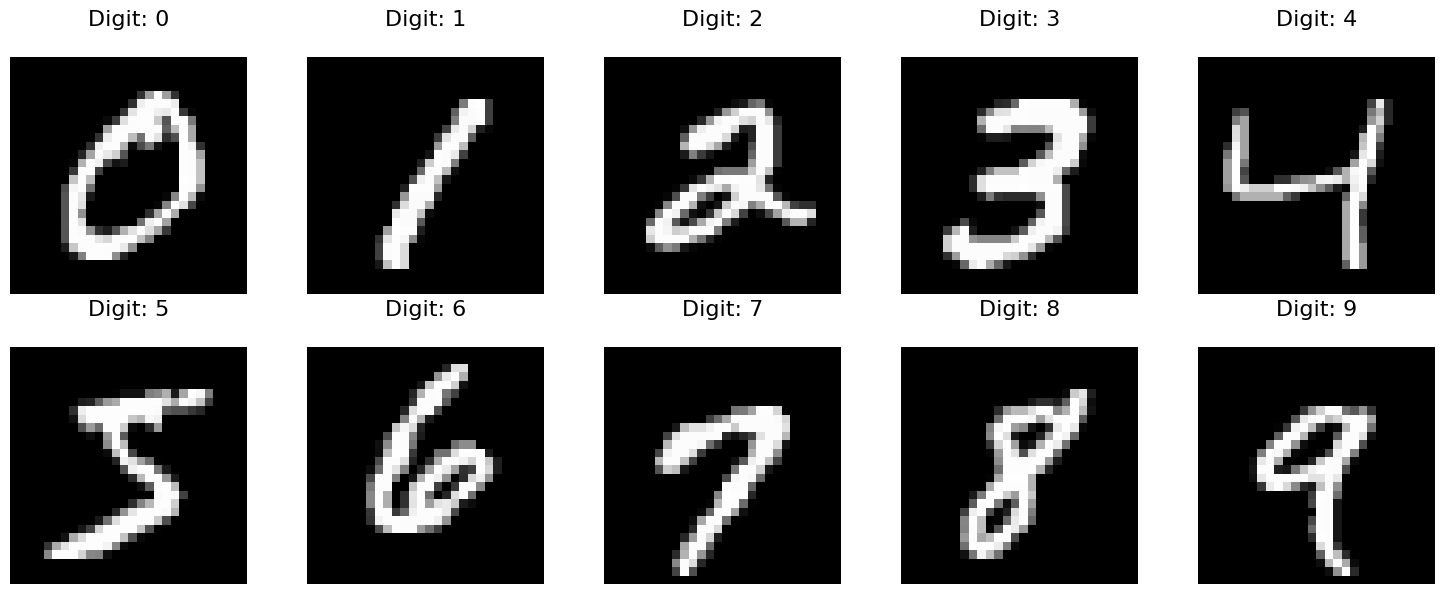

In [156]:
num_of_images = 10
rows = 2
columns = 5

# Ensure X_train is in the correct shape
if X_train.ndim == 2:  # Flattened, reshape to (num_samples, 28, 28)
    X_train_display = X_train.reshape(-1, 28, 28)
else:
    X_train_display = X_train  # Already in the correct shape

# Create a figure with a grid of subplots
fig, axes = plt.subplots(rows, columns, figsize=(15, 6))

# Loop through the unique digits and display one sample for each
for i, ax in enumerate(axes.flat):
    if i < num_of_images:
        # Find the first sample of the digit `i`
        sample_index = np.where(y_train == i)[0][0]
        sample_image = X_train_display[sample_index]
        
        # Display the image
        ax.matshow(sample_image, cmap="gray")
        ax.set_title(f"Digit: {i}", fontsize=16)
        ax.axis("off")

plt.tight_layout()
plt.show()


### 4. Preprocess the data.

In [157]:
# Normalization 
X_train = X_train / 255
X_test = X_test / 255

### 5. Build and compile the neural network.

In [182]:
model = Sequential ([
    Flatten(input_shape= (28, 28,)),
    Dense (128, activation = "relu"),
    Dense (64, activation = "relu"),
    Dropout (0.25),
    Dense (10, activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### 6. Train the model.

In [183]:
epochs = 10

model.fit (x = X_train, y=y_train ,epochs = epochs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 774us/step - accuracy: 0.8457 - loss: 0.5005
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9582 - loss: 0.1390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9709 - loss: 0.0960
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9751 - loss: 0.0775
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9811 - loss: 0.0596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9841 - loss: 0.0509
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.9859 - loss: 0.0444
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9888 - loss: 0.0355
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.9892 - loss: 0.0330
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0303


### 7. Evaluate the model.

In [186]:
test_loss, test_accuracy = model.evaluate (X_test, y_test)

print ("Test Loss: {}, Test Accuracy: {}".format (test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.9750 - loss: 0.0944
Test Loss: 0.07750160247087479, Test Accuracy: 0.9796000123023987


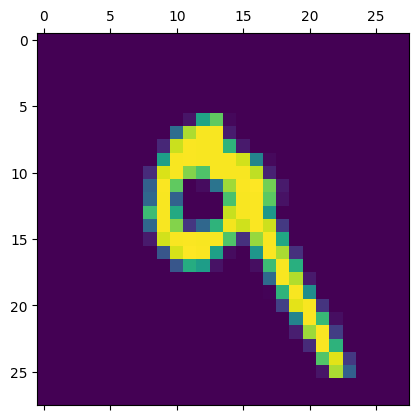

In [187]:
plt.matshow(X_test[7])

In [188]:
y_predicted = model.predict (X_test)

y_predicted[7]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step


array([5.36254966e-14, 6.98861635e-10, 1.10207965e-13, 4.24199307e-08,
       1.55648086e-05, 6.25456877e-08, 2.54755429e-16, 1.38920328e-07,
       1.54525885e-08, 9.99984205e-01], dtype=float32)

In [189]:
np.argmax(y_predicted[7])

9

### 8. Visualize predictions.

In [190]:
y_predicted_labels = [np.argmax (i) for i in y_predicted]


In [191]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1129,    2,    0,    0,    0,    2,    0,    2,    0],
       [   7,    3, 1009,    2,    2,    0,    0,    4,    4,    1],
       [   0,    0,    6,  992,    0,    3,    0,    6,    2,    1],
       [   1,    0,    3,    0,  951,    0,    6,    2,    0,   19],
       [   4,    0,    0,    9,    0,  865,    7,    0,    5,    2],
       [   3,    3,    2,    0,    3,    4,  941,    0,    2,    0],
       [   2,    3,   10,    1,    0,    0,    0, 1005,    1,    6],
       [   5,    2,    1,    4,    3,    1,    3,    5,  947,    3],
       [   5,    3,    0,    2,    9,    2,    0,    5,    2,  981]],
      dtype=int32)>

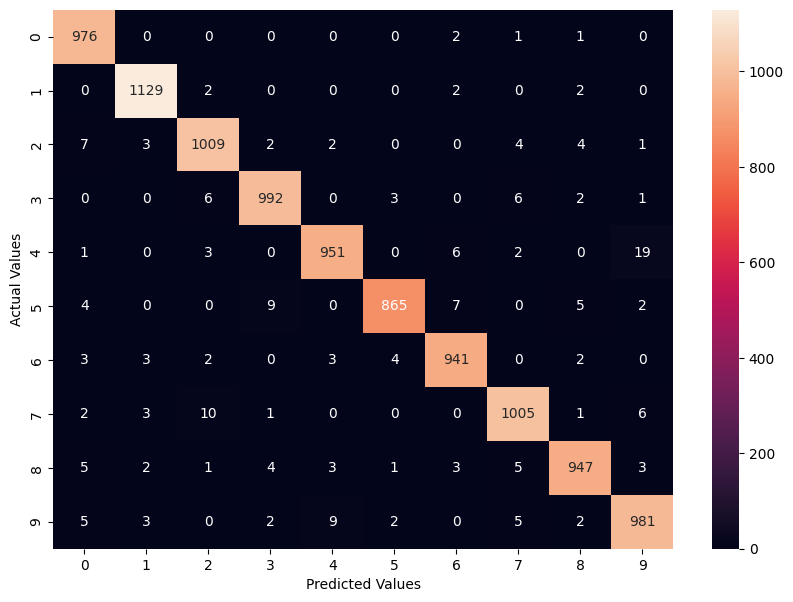

In [193]:
plt.figure (figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt= "d")
plt.xlabel ("Predicted Values")
plt.ylabel ("Actual Values")
plt.show()

In [195]:
model.save("digit_classifier_model.keras")

## Using CNN

### 9. Build and compile the convolutional neural network (CNN)

In [120]:
# Reshape Data to (28, 28, 1)
X_train_CNN = X_train.reshape(-1, 28, 28, 1)  
X_test_CNN = X_test.reshape(-1, 28, 28, 1)   


In [121]:
print (X_train_CNN.shape)
print (X_test_CNN.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [144]:
CNN_model = Sequential([
    # CNN layers
    Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(28, 28, 1)),  # First Conv layer
    MaxPooling2D((2, 2)), 

    Conv2D(filters=64, kernel_size=(3, 3), strides=1, activation='relu'),  # Second Conv layer
    MaxPooling2D((2, 2)), 

    Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu'),  # Third Conv layer
    MaxPooling2D((2, 2)), 
    
    # Dense layers
    Flatten(),  # Flatten layer to prepare for Dense layers
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [147]:
epochs = 20
history = model.fit (x = X_train, y=y_train, epochs = epochs,
           validation_data=(X_test, y_test))
history

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9969 - loss: 0.0088 - val_accuracy: 0.9770 - val_loss: 0.1194
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9755 - val_loss: 0.1269
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9752 - val_loss: 0.1246
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9770 - val_loss: 0.1149
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9979 - loss: 0.0068 - val_accuracy: 0.9746 - val_loss: 0.1276
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.9763 - val_loss: 0.1189
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 0.9741 - val_loss: 0.1373
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9975 -

### 9. Evaluate the CNN model.

AttributeError: 'Figure' object has no attribute 'subtitle'

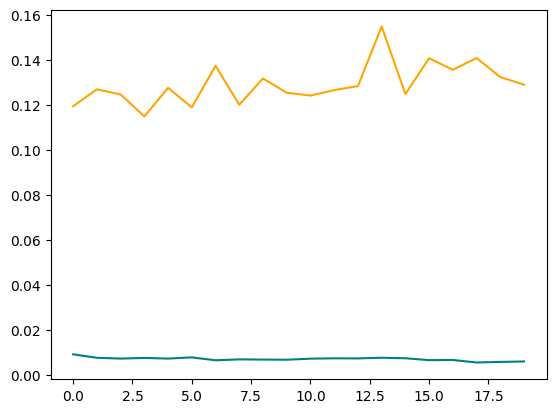

In [149]:
fig = plt.figure()
plt.plot(history.history["loss"], color = "teal", label = "loss")
plt.plot(history.history["val_loss"], color = "orange", label = "val_loss")
fig.subtitle("Loss", fontsize = 20)


AttributeError: 'Figure' object has no attribute 'subtitle'

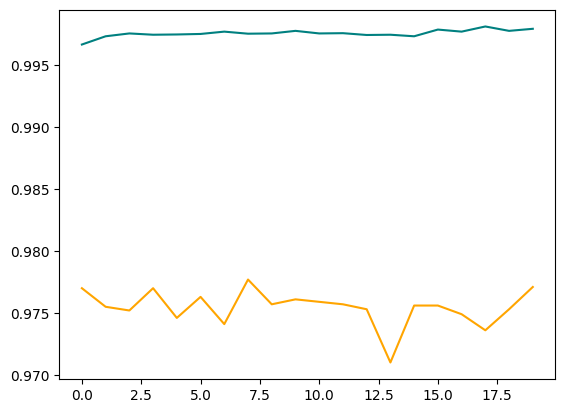

In [150]:
fig = plt.figure()
plt.plot(history.history["accuracy"], color = "teal", label = "accuracy")
plt.plot(history.history["val_accuracy"], color = "orange", label = "val_accuracy")
fig.subtitle("Loss", fontsize = 20)

In [146]:
test_loss, test_accuracy = CNN_model.evaluate (X_test, y_test)

print ("Test Loss: {}, Test Accuracy: {}".format (test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0563 - loss: 2.3026
Test Loss: 2.302626848220825, Test Accuracy: 0.05290000140666962


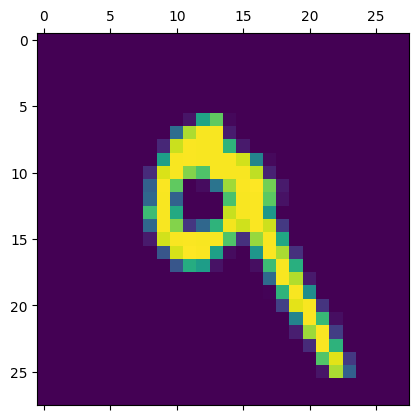

In [126]:
plt.matshow(X_test[7])

In [127]:
y_predicted_CNN = model.predict (X_test)

y_predicted_CNN[7]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step


array([4.1094936e-12, 5.8028173e-11, 1.1331198e-06, 6.7915261e-04,
       1.7089272e-07, 7.1032652e-08, 8.9033678e-17, 7.1314480e-06,
       2.6575964e-10, 9.9931234e-01], dtype=float32)

In [128]:
np.argmax(y_predicted_CNN[7])

9

### 10. Visualize CNN_model predictions.

In [57]:
y_predicted_labels_CNN = [np.argmax (i) for i in y_predicted_CNN]

In [58]:
cm_CNN = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels_CNN)

cm_CNN

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    0,    0,    0,    0,    4,    1,    2,    0],
       [   0, 1125,    1,    1,    0,    1,    2,    1,    4,    0],
       [   3,    2, 1001,    2,    2,    1,    2,   10,    9,    0],
       [   0,    0,    1,  993,    0,    3,    1,    4,    6,    2],
       [   2,    0,    0,    0,  967,    1,    5,    1,    0,    6],
       [   2,    1,    0,    8,    1,  873,    0,    0,    5,    2],
       [   2,    3,    0,    0,    7,   10,  935,    0,    1,    0],
       [   0,    3,    7,    1,    0,    0,    0, 1009,    2,    6],
       [   3,    0,    2,    2,    5,    7,    1,    4,  946,    4],
       [   1,    2,    0,    5,    9,    5,    0,    3,    4,  980]],
      dtype=int32)>

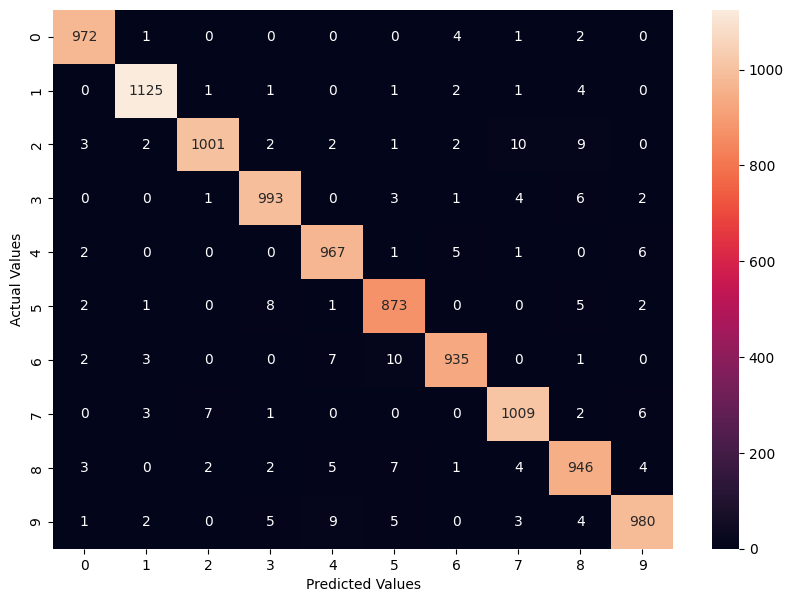

In [59]:
plt.figure (figsize = (10, 7))
sns.heatmap(cm_CNN, annot=True, fmt= "d")
plt.xlabel ("Predicted Values")
plt.ylabel ("Actual Values")
plt.show()

### 11. Saving model

In [180]:
model.save("mnist_cnn_model.h5")
